In [14]:
!# Importing all the necessary Libraries
! pip install holidays
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sys, math, os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score    
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
sys.path.append("..")
from sklearn.svm import SVC
from sklearn import metrics
import datetime as dt
%matplotlib inline
sns.set(style='ticks', palette='Set2')
from datetime import date 
import holidays 

In [6]:
df_2021= pd.read_csv("/Users/rajanpc/Desktop/DSBA_Project/202109-citibike-tripdata.csv")

df_2021

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280216,8A1C8DB4249BF100,classic_bike,2021-09-26 16:00:45,2021-09-26 16:20:51,8 Ave & W 31 St,6450.05,W 67 St & Broadway,7116.04,40.750585,-73.994685,40.774925,-73.982666,casual
3280217,C290EE73DF58AD79,classic_bike,2021-09-07 08:22:06,2021-09-07 08:38:40,S Portland Ave & Hanson Pl,4354.05,S 3 St & Bedford Ave,5235.05,40.685396,-73.974315,40.712605,-73.962644,casual
3280218,E42F8B93C4168658,classic_bike,2021-09-30 20:50:23,2021-09-30 20:59:13,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,casual
3280219,7221F0C58026A827,classic_bike,2021-09-08 19:06:24,2021-09-08 19:10:57,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,member


In [11]:
# Sorting the dataframe

df_2021_cleaned = df_2021[df_2021['start_station_id'] != df_2021['end_station_id']]
df_2021_cleaned.dropna()



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member
5,0702265BE26C21F3,classic_bike,2021-09-23 09:35:32,2021-09-23 09:38:00,William St & Pine St,5065.12,Fulton St & Pearl St,5024.09,40.707179,-74.008873,40.707722,-74.004386,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280216,8A1C8DB4249BF100,classic_bike,2021-09-26 16:00:45,2021-09-26 16:20:51,8 Ave & W 31 St,6450.05,W 67 St & Broadway,7116.04,40.750585,-73.994685,40.774925,-73.982666,casual
3280217,C290EE73DF58AD79,classic_bike,2021-09-07 08:22:06,2021-09-07 08:38:40,S Portland Ave & Hanson Pl,4354.05,S 3 St & Bedford Ave,5235.05,40.685396,-73.974315,40.712605,-73.962644,casual
3280218,E42F8B93C4168658,classic_bike,2021-09-30 20:50:23,2021-09-30 20:59:13,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,casual
3280219,7221F0C58026A827,classic_bike,2021-09-08 19:06:24,2021-09-08 19:10:57,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,member


In [12]:
#Create 'date' column
df_2021_cleaned['date'] = df_2021_cleaned['started_at'].apply(lambda x:x.split(' ')[0])

# Create 'hour' Column
df_2021_cleaned["hour"] = df_2021_cleaned['started_at'].apply(lambda x: x.split()[1].split(":")[0]) 

# Create 'day' column: the value of da is from 0 to 6: Mon - Sun
df_2021_cleaned['day'] = df_2021_cleaned['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.weekday

# Change the format to datetime
df_2021_cleaned['date'] = pd.to_datetime(df_2021_cleaned['date'],format = '%Y-%m-%d')
df_2021_cleaned['started_at'] = pd.to_datetime(df_2021_cleaned['started_at'])
df_2021_cleaned['ended_at']= pd.to_datetime(df_2021_cleaned['ended_at'])

<ipython-input-12-b03d91725ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_cleaned['date'] = df_2021_cleaned['started_at'].apply(lambda x:x.split(' ')[0])
<ipython-input-12-b03d91725ff9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_cleaned["hour"] = df_2021_cleaned['started_at'].apply(lambda x: x.split()[1].split(":")[0])
<ipython-input-12-b03d91725ff9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [15]:
week_end = []
for i in df_2021_cleaned['date']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  week_end.append(k)    
df_2021_cleaned['Weekend'] = week_end

holidays = holidays.UnitedStates(years = 2021) 
Holi_day = []
for i in df_2021_cleaned['date']:
  if i in holidays:
    Holi_day.append(1)
  else:
    Holi_day.append(0)  
df_2021_cleaned['Holiday'] = Holi_day 

Working_Day = []
for i in range(len(df_2021_cleaned['Weekend'])):
    if (df_2021_cleaned['Weekend'].iloc[i] == 1) or (df_2021_cleaned['Holiday'].iloc[i] == 1):
      Working_Day.append('FALSE')
    else:
      Working_Day.append('TRUE')
df_2021_cleaned['Working_Day'] = Working_Day




<ipython-input-15-9bf412b1c2de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_cleaned['Weekend'] = week_end
<ipython-input-15-9bf412b1c2de>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_cleaned['Holiday'] = Holi_day
<ipython-input-15-9bf412b1c2de>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [17]:
#Weather

dfw= pd.read_csv("/Users/rajanpc/Desktop/DSBA_Project/weather_nyc_20180101_to_20211031.csv")

dfw = dfw[(dfw['DATE']> "2020-12-31") & (dfw['DATE']< "2021-12-31")]

dfw['DATE']= pd.to_datetime(dfw['DATE']) 

#Add calculated column with the average temp = (TMAX + TMIN)/2
dfw['COLD'] = (dfw['TMAX'] + dfw['TMIN'])/2

# Leave only important columns out of 'NAME','DATE', 'TEMP', 'PRCP', 'SNOW', 'PREC', 'COLD'
dfw = dfw.loc[:, dfw.columns.intersection(['NAME','DATE', 'PRCP', 'COLD'])]


In [189]:
df_2021_final = pd.merge(df_2021_cleaned[['date','start_station_name','end_station_name','Weekend','Holiday','Working_Day']], dfw[['DATE','COLD','PRCP']],how='left',left_on='date', right_on='DATE')
df_2021_final = df_2021_final.drop(columns='DATE')

#Exctracting the Necessary features
df_trips= pd.DataFrame()

for i in ['West St & Chambers St','E 103 St & Lexington Ave','Van Brunt St & Wolcott St	40.677343','Jay St & Tech Pl']:
    dft = df_2021_final[df_2021_final['start_station_name'].str.lower() == i.lower()]
    dft = dft[['date','Working_Day','COLD','PRCP']].sort_values(by = ['date']).groupby(['date','Working_Day','COLD','PRCP']).size().reset_index(name='Total_Trips')
    df_trips = pd.concat([df_trips, dft])\
           .groupby(['date','Working_Day','COLD','PRCP'])['Total_Trips']\
           .sum().reset_index()

df_trips.loc[df_trips['Working_Day'] == 'FALSE', 'Day_Type'] = 0
df_trips.loc[df_trips['Working_Day'] == 'TRUE', 'Day_Type'] = 1
df_trips.drop('Working_Day', axis=1, inplace=True)
df_trips['Day_num'] = df_trips['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.day
cus_bins = [0,300,500,750,1000]
trips_label = ['0-300','301-500','501-750','More than 750']

df_trips['trip_category'] = pd.cut(df_trips['Total_Trips'],bins=cus_bins,labels=trips_label,include_lowest=True)
df_trips['trip_category'].groupby(df_trips['trip_category']).count()
df_trips

,date,COLD,PRCP,Total_Trips,Day_Type,Day_num,trip_category
0,2021-09-01,70.5,7.13,230,1.0,1,0-300
1,2021-09-02,69.0,0.10,783,1.0,2,More than 750
2,2021-09-03,66.5,0.00,646,1.0,3,501-750
3,2021-09-04,70.0,0.00,607,0.0,4,501-750
4,2021-09-05,70.5,0.02,423,0.0,5,301-500
5,2021-09-06,75.0,0.00,629,0.0,6,501-750
6,2021-09-07,72.0,0.00,319,1.0,7,301-500
7,2021-09-08,76.0,0.00,175,1.0,8,0-300
8,2021-09-09,72.0,0.26,339,1.0,9,301-500
9,2021-09-10,68.5,0.00,769,1.0,10,More than 750


In [218]:
#model
np.random.seed(42)
features = ['COLD','PRCP','Day_Type']
X = df_trips[features]
Y = df_trips['trip_category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)



In [251]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [252]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(X_test,Y_test)
print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

Accuracy on testing = 0.8182


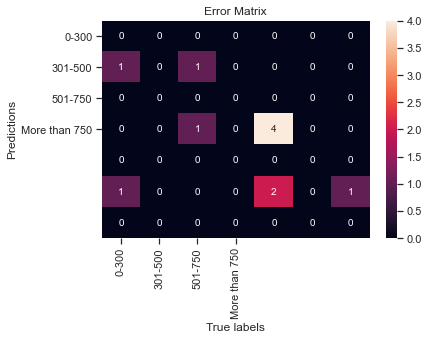

In [253]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

labels = ['0-300','301-500','501-750','More than 750']


def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(clf.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

/Users/rajanpc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:407: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


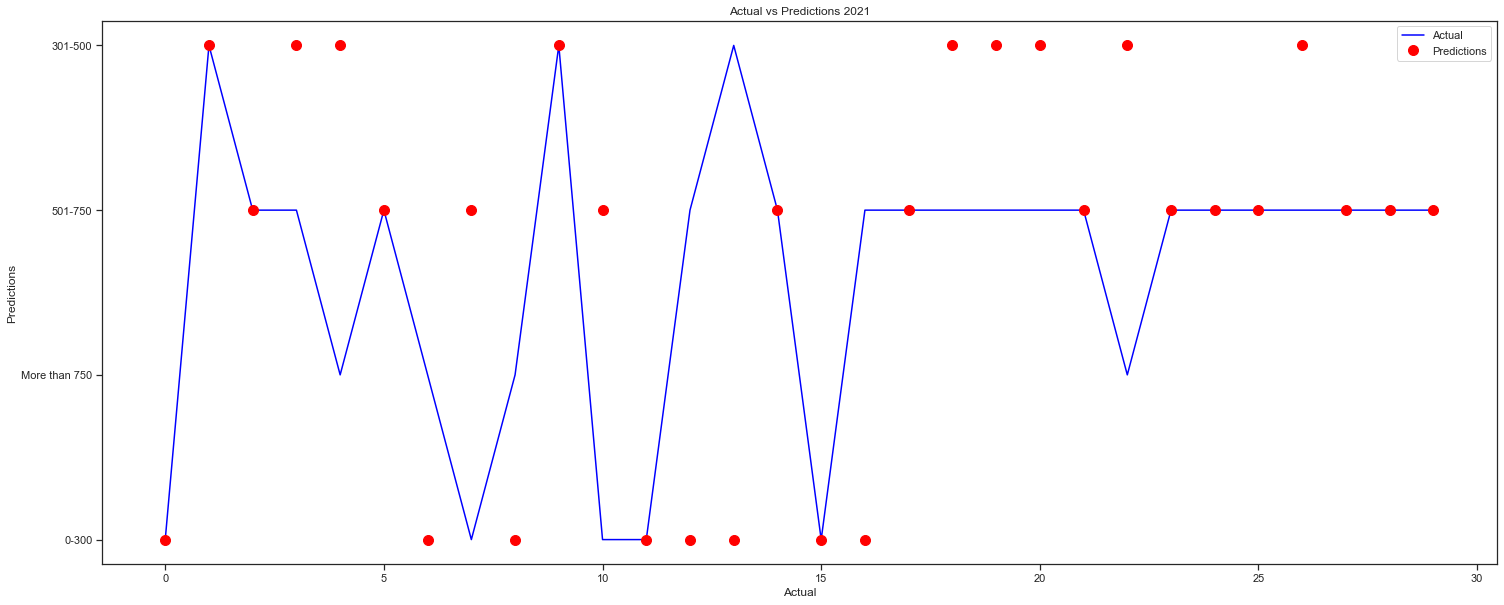

In [254]:
Predictions=Knnmodel.predict(X)
plt.figure(figsize=(25,10))
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.plot(Y,'-',label='Actual',color='blue')
plt.plot(Prediction,'.',label='Predictions',color='red',markersize=20)
plt.legend()
plt.title("Actual vs Predictions 2021")
plt.show()



/Users/rajanpc/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:407: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


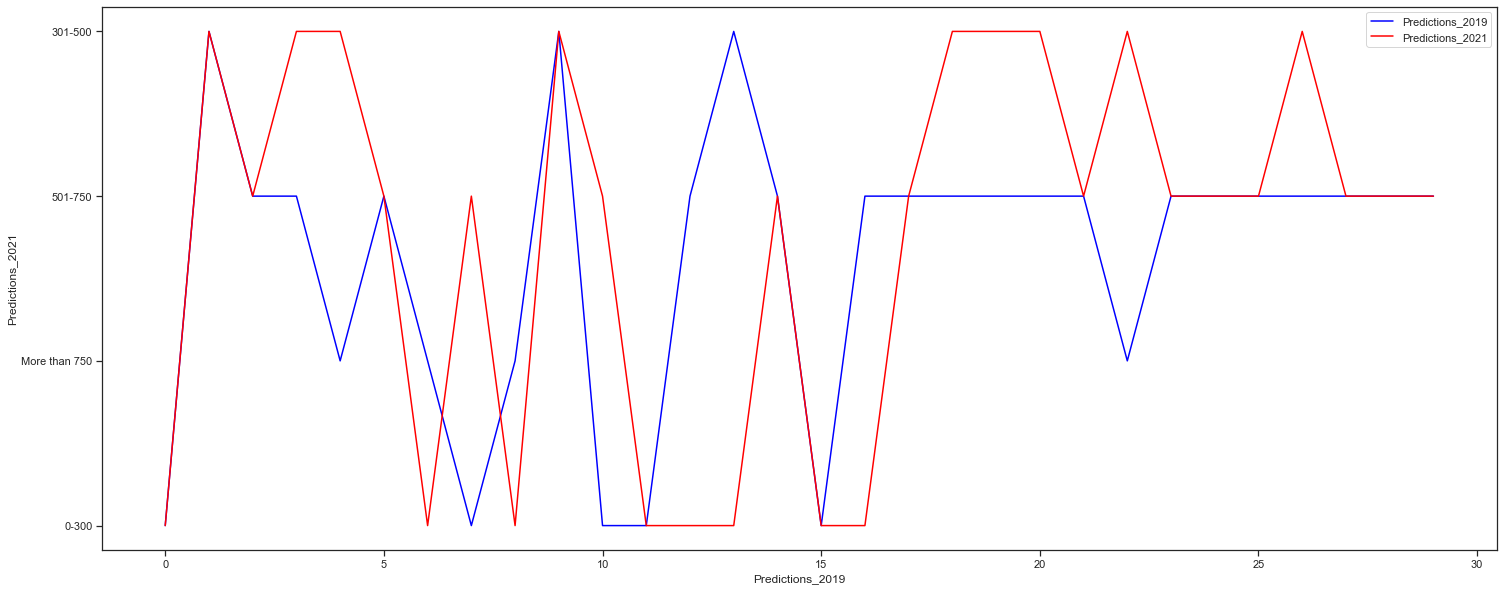

In [246]:
Predictions_2019=['301-500' '0-300' '501-750' '501-750' '501-750' '0-300' '501-750'
 '501-750' '501-750' '501-750' 'More than 1000' '301-500' '501-750'
 '501-750' '501-750' '501-750' '501-750' '501-750' '501-750'
 'More than 1000' 'More than 1000' '501-750' '501-750' '501-750' '501-750'
 '501-750' 'More than 1000' 'More than 1000' 'More than 1000' '501-750']

Predictions_2021=Knnmodel.predict(X)

plt.figure(figsize=(25,10))
plt.xlabel('Predictions_2019')
plt.ylabel('Predictions_2021')
plt.plot(Y,'-',label='Predictions_2019',color='blue')
plt.plot(Prediction,'-',label='Predictions_2021',color='red',markersize=20)
plt.legend()
plt.show()

